In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
sns.set()

In [ ]:
names=["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"]
"""
dataset info:
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute):
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps
"""

'\ndataset info:\n1. Id number: 1 to 214\n2. RI: refractive index\n3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)\n4. Mg: Magnesium\n5. Al: Aluminum\n6. Si: Silicon\n7. K: Potassium\n8. Ca: Calcium\n9. Ba: Barium\n10. Fe: Iron\n11. Type of glass: (class attribute):\n-- 1 building_windows_float_processed\n-- 2 building_windows_non_float_processed\n-- 3 vehicle_windows_float_processed\n-- 4 vehicle_windows_non_float_processed (none in this database)\n-- 5 containers\n-- 6 tableware\n-- 7 headlamps\n'

In [ ]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",names=names)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


We can see that we dont have any null values.
We dont have any categorical columns , so we dont have to apply any encoding techniques.
 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,214.0,107.500000,61.920648,1.00000,54.250000,107.50000,160.750000,214.00000
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000


let us check the outliers of each column using boxplot.
It is a standardized way of displaying the distribution of data. Any data points which are less than Q1-1.5IQR or greater than Q3+1.5IQR are considered to be outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


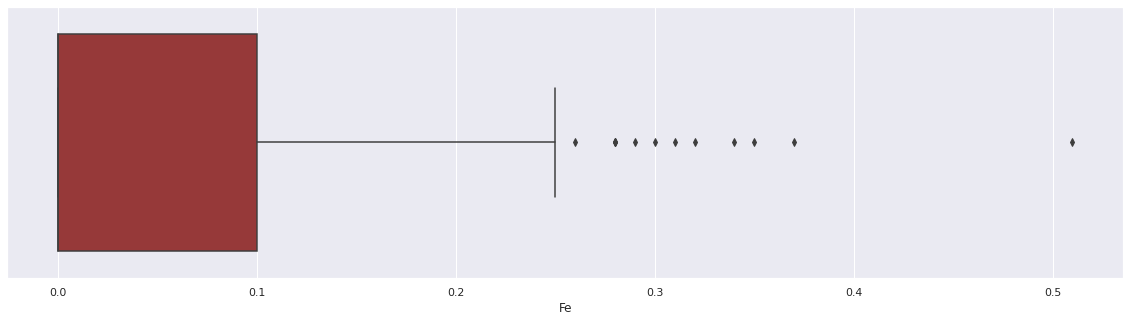

In [ ]:
plt.rcParams['figure.figsize']=(20,5)
sns.boxplot(df["Fe"], color='brown')

In [ ]:
df['Fe'].sort_values(ascending = False).head(11)

174    0.51
162    0.37
145    0.35
105    0.34
71     0.32
56     0.31
44     0.30
118    0.29
175    0.28
106    0.28
135    0.28
Name: Fe, dtype: float64

In [ ]:
df[df["Fe"]>=0.28]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
44,45,1.51786,12.73,3.43,1.19,72.95,0.62,8.76,0.00,0.30,1
56,57,1.51215,12.99,3.47,1.12,72.98,0.62,8.35,0.00,0.31,1
71,72,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,2
105,106,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
106,107,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
118,119,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29,2
135,136,1.51789,13.19,3.90,1.30,72.33,0.55,8.44,0.00,0.28,2
145,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
162,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
174,175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5


As the range is too small to differentiate without domain knowledge , I am not handling the outliers for this , column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


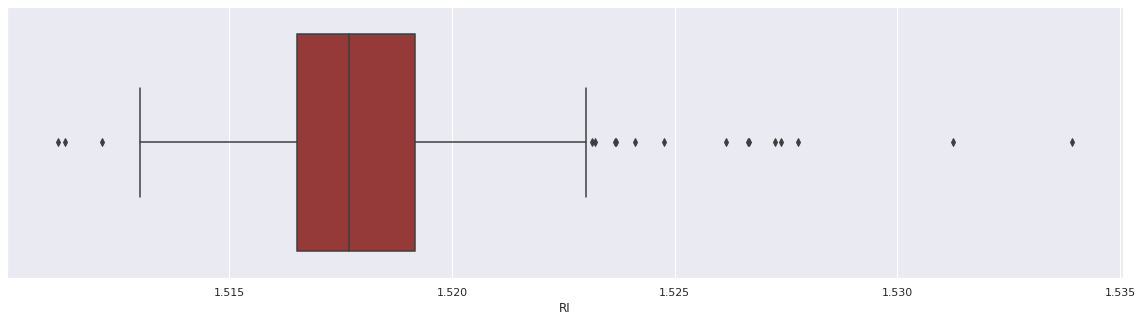

In [ ]:
plt.rcParams['figure.figsize']=(20,5)
sns.boxplot(df["RI"], color='brown')

Range is too small for "RI" column also , hence not performing any Outlier handling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


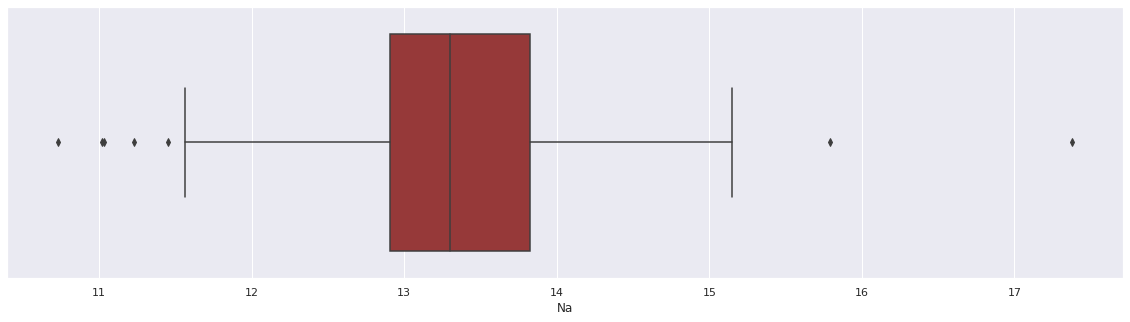

In [ ]:
plt.rcParams['figure.figsize']=(20,5)
sns.boxplot(df["Na"], color='brown')

In [ ]:
df[df["Na"]>=15]

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
184,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
189,190,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.0,7
199,200,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.0,7
200,201,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.0,7


In [ ]:
(df[["Na","Type of glass"]][df["Type of glass"]==7])

,Na,Type of glass
185,13.69,7
186,14.32,7
187,13.44,7
188,14.86,7
189,15.79,7
190,13.88,7
191,14.85,7
192,14.20,7
193,14.75,7
194,14.56,7


We noticed range of Na is also so small, hence not performing any outlier handling

In [ ]:
#As standatd deviation values of all columns are very small , I am not performing any outlier handling for the data.
#As the data has some outliers , I will perform Standardization for all the columns of the data to scale the data.

In [ ]:
df["Type of glass"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [ ]:
#As Id column is not helpful for any analysis , i will drop that column
df.drop("Id",axis=1,inplace=True) 

In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


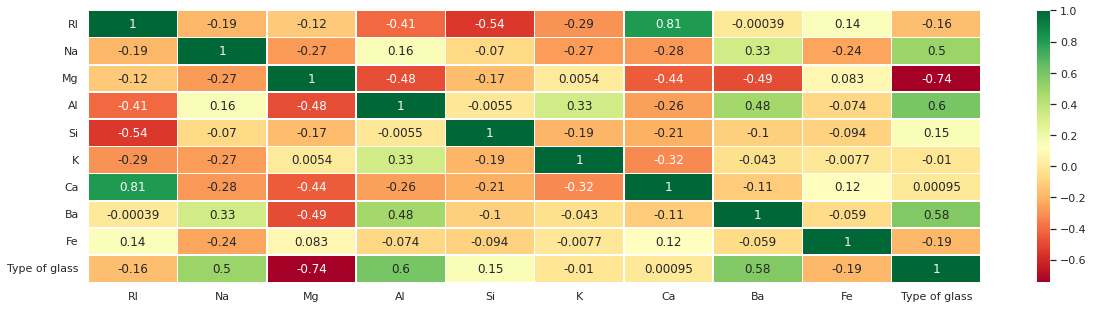

In [ ]:
sns.heatmap(df.corr(),annot=True,linewidths=0.5,cmap="RdYlGn")

from heatmap we can notice that the columns ["RI","Si","K","Ca","Fe"] have very less impact on the Type of glass column.

In [ ]:
#Splitting the dependent and independent variables

X=df.iloc[:,:-1]
Y=df["Type of glass"]
print("Shape of X is ",X.shape)
print("Shape of Y is ",Y.shape)

Shape of X is  (214, 9)
Shape of Y is  (214,)


In [ ]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of glass, Length: 214, dtype: int64

In [ ]:
#from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0,stratify=Y)
print('Shape of X_train is ', X_train.shape)
print('Shape of X_test is ', X_test.shape)
print('Shape of Y_train is ', Y_train.shape)
print('Shape of Y_test is ', Y_test.shape)

Shape of X_train is  (171, 9)
Shape of X_test is  (43, 9)
Shape of Y_train is  (171,)
Shape of Y_test is  (43,)


# Standardization
Data Standardization is the process of rescaling one or more attributes so that they have a mean value of 0 and a standard deviation of 1.

In [ ]:
#from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-2.39987759,  5.0116347 , -1.84488978, ..., -1.74543963,
        -0.32664601, -0.59404488],
       [ 0.04688626,  0.91317326, -0.33219569, ...,  0.22800243,
        -0.32664601, -0.59404488],
       [-0.14898764, -0.70627959,  0.57265786, ..., -0.17851185,
        -0.32664601, -0.59404488],
       ...,
       [-0.23198506, -0.99279818,  0.58647242, ..., -0.34850874,
        -0.32664601, -0.59404488],
       [-0.04607085, -0.60662096,  0.5588433 , ..., -0.42981159,
        -0.32664601, -0.59404488],
       [-0.80300729, -0.70627959,  0.64863793, ..., -0.69589367,
        -0.32664601,  2.0523715 ]])

In [ ]:
X_test

array([[-1.95116734e-02, -3.35837951e-02,  4.62141395e-01,
         2.30555024e-01, -7.24861510e-01,  9.44805276e-02,
        -1.59061410e-02, -3.26646006e-01, -5.94044883e-01],
       [ 4.25354480e-01,  1.76027167e+00,  7.45339833e-01,
        -2.34152934e+00, -8.80546649e-01, -6.64630307e-01,
        -8.51497219e-03, -3.26646006e-01, -5.94044883e-01],
       [-4.90937000e-01, -3.35837951e-02,  6.00286975e-01,
         3.74591748e-01, -2.05911046e-01,  2.66354679e-01,
        -6.66328992e-01, -3.26646006e-01, -5.94044883e-01],
       [ 7.63983941e-01,  2.40477457e-01, -4.01268475e-01,
         4.98051797e-01, -6.72966463e-01,  5.15119898e-02,
         4.12781647e-01,  2.36297111e-01,  1.13630429e+00],
       [-5.57334934e-01, -1.45699762e-01,  6.21008812e-01,
        -9.86717742e-02,  1.66913892e-03,  9.44805276e-02,
        -4.22420423e-01, -3.26646006e-01,  4.23807572e-01],
       [ 1.24536896e+00,  1.06266121e+00,  7.93690786e-01,
        -1.97114919e+00, -1.20489069e+00, -5.500475

In [ ]:
# from https://www.kdnuggets.com/2020/11/most-popular-distance-metrics-knn.html


Distance Metrics
 
For the algorithm to work best on a particular dataset we need to choose the most appropriate distance metric accordingly. There are a lot of different distance metrics available, but we are only going to talk about a few widely used ones. Euclidean distance function is the most popular one among all of them as it is set default in the SKlearn KNN classifier library in python.

So here are some of the distances used:

 
Minkowski Distance – It is a metric intended for real-valued vector spaces. We can calculate Minkowski distance only in a normed vector space, which means in a space where distances can be represented as a vector that has a length and the lengths cannot be negative.

There are a few conditions that the distance metric must satisfy:

Non-negativity: d(x, y) >= 0

Identity: d(x, y) = 0 if and only if x == y

Symmetry: d(x, y) = d(y, x)

Inequality: d(x, y) + d(y, z) >= d(x, z)


Minkowski distance is in generalized form and we can manipulate it to get different distance metrices.

The p value in the formula can be manipulated to give us different distances like:

p = 1, when p is set to 1 we get Manhattan distance

p = 2, when p is set to 2 we get Euclidean distance

formula for MinKowski distance is :

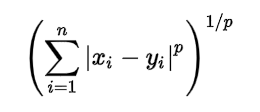

In [ ]:
#Training KNN model with Euclidean distance
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred = classifier.predict(X_test)

0.6976744186046512

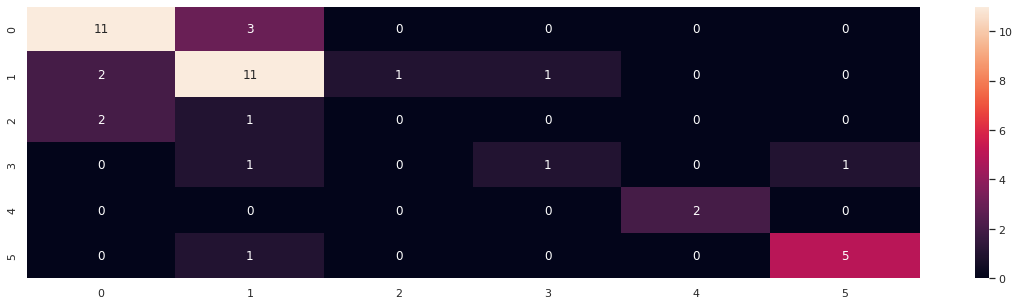

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm,annot=True)
accuracy_score(Y_test, Y_pred)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.65      0.73      0.69        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.70        43
   macro avg       0.62      0.61      0.61        43
weighted avg       0.66      0.70      0.68        43



For Euclidian distance we got accuracy oaround 70 percent.

In [ ]:
#let us try the model with Manhattan distance
from sklearn.neighbors import KNeighborsClassifier
classifier_man = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
classifier_man.fit(X_train, Y_train)

KNeighborsClassifier(p=1)

In [ ]:
Y_pred_man = classifier_man.predict(X_test)

0.7209302325581395

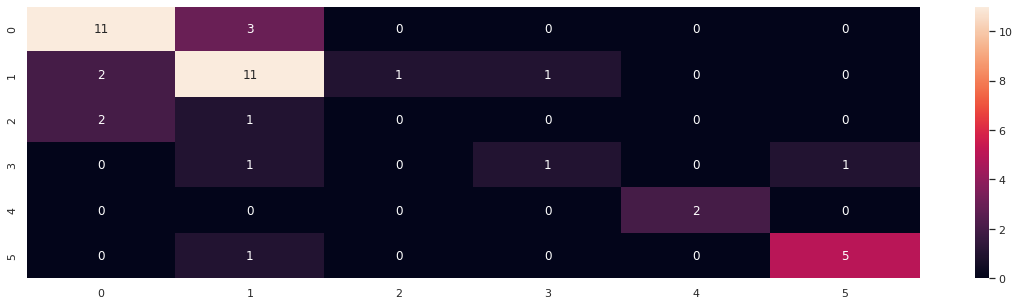

In [ ]:
cm_man = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm_man,annot=True)
accuracy_score(Y_test, Y_pred_man)

In [ ]:
#Classification Report

print(classification_report(Y_test, Y_pred_man))

              precision    recall  f1-score   support

           1       0.71      0.86      0.77        14
           2       0.73      0.73      0.73        15
           3       0.00      0.00      0.00         3
           5       0.50      0.33      0.40         3
           6       1.00      1.00      1.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.72        43
   macro avg       0.63      0.63      0.62        43
weighted avg       0.68      0.72      0.70        43



With Manhattan distance we have achived an accuracy of 72 percent 

Till now we have used all the columns(except ID) given in dataset , 
now let us check the correlation of columns with output variable and select columns which has high corelation values.


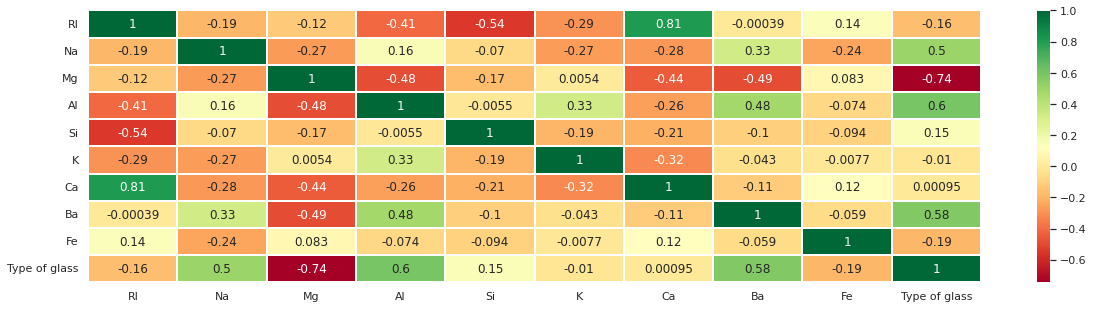

In [ ]:
sns.heatmap(df.corr(),annot=True,linewidths=1,cmap="RdYlGn")

from heatmap we can notice that the columns ["RI","Si","K","Ca","Fe"] have very less impact on the Type of glass column

In [ ]:
df_selected=df.copy()


In [ ]:
df_selected.drop(["RI","Si","K","Ca","Fe"],axis=1,inplace=True)
df_selected

,Na,Mg,Al,Ba,Type of glass
0,13.64,4.49,1.10,0.00,1
1,13.89,3.60,1.36,0.00,1
2,13.53,3.55,1.54,0.00,1
3,13.21,3.69,1.29,0.00,1
4,13.27,3.62,1.24,0.00,1
...,...,...,...,...,...
209,14.14,0.00,2.88,1.06,7
210,14.92,0.00,1.99,1.59,7
211,14.36,0.00,2.02,1.64,7
212,14.38,0.00,1.94,1.57,7


In [ ]:
#Splitting the dependent and independent variables

X_sel=df_selected.iloc[:,:-1]
Y_sel=df_selected["Type of glass"]
print("Shape of X is ",X_sel.shape)
print("Shape of Y is ",Y_sel.shape)

Shape of X is  (214, 4)
Shape of Y is  (214,)


In [ ]:
X_sel

,Na,Mg,Al,Ba
0,13.64,4.49,1.10,0.00
1,13.89,3.60,1.36,0.00
2,13.53,3.55,1.54,0.00
3,13.21,3.69,1.29,0.00
4,13.27,3.62,1.24,0.00
...,...,...,...,...
209,14.14,0.00,2.88,1.06
210,14.92,0.00,1.99,1.59
211,14.36,0.00,2.02,1.64
212,14.38,0.00,1.94,1.57


In [ ]:
Y_sel

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type of glass, Length: 214, dtype: int64

In [ ]:
#from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train_sel, X_test_sel, Y_train_sel, Y_test_sel = train_test_split(X_sel, Y_sel, test_size=0.2, random_state=0,stratify=Y_sel)
print('Shape of X_train is ', X_train_sel.shape)
print('Shape of X_test is ', X_test_sel.shape)
print('Shape of Y_train is ', Y_train_sel.shape)
print('Shape of Y_test is ', Y_test_sel.shape)

Shape of X_train is  (171, 4)
Shape of X_test is  (43, 4)
Shape of Y_train is  (171,)
Shape of Y_test is  (43,)


In [ ]:
#from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

sc_sel=StandardScaler()
X_train_sel = sc_sel.fit_transform(X_train_sel)
X_test_sel = sc_sel.transform(X_test_sel)

In [ ]:
#Training KNN model with Euclidean distance
from sklearn.neighbors import KNeighborsClassifier
classifier_sel_eu = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_sel_eu.fit(X_train_sel, Y_train_sel)

KNeighborsClassifier()

In [ ]:
Y_pred_sel = classifier_sel_eu.predict(X_test_sel)

0.6976744186046512

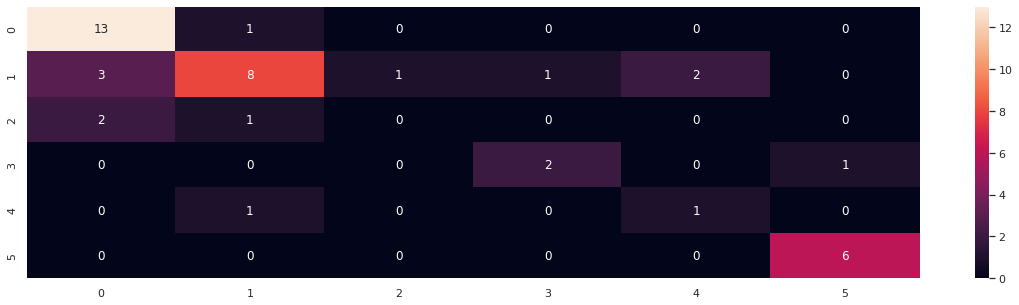

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_sel_eu = confusion_matrix(Y_test_sel, Y_pred_sel)
sns.heatmap(cm_sel_eu,annot=True)
accuracy_score(Y_test_sel, Y_pred_sel)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test_sel, Y_pred_sel))

              precision    recall  f1-score   support

           1       0.72      0.93      0.81        14
           2       0.73      0.53      0.62        15
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       0.33      0.50      0.40         2
           7       0.86      1.00      0.92         6

    accuracy                           0.70        43
   macro avg       0.55      0.60      0.57        43
weighted avg       0.67      0.70      0.67        43



We got accuracy of 70 percent with the selected columns

In [ ]:
Y_pred_sel_man = classifier_sel_man.predict(X_test_sel)

0.6744186046511628

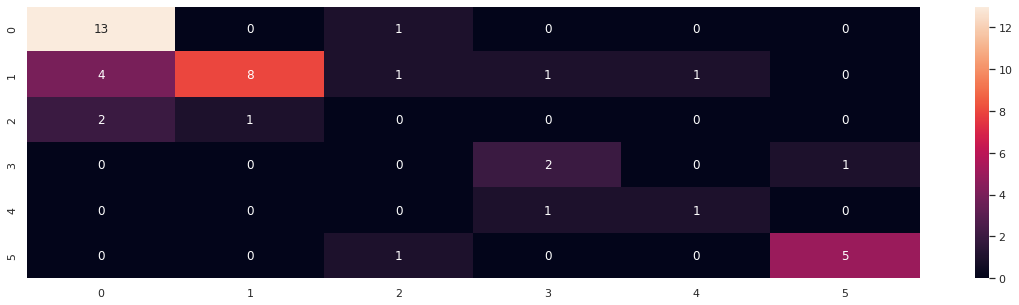

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_sel_man = confusion_matrix(Y_test_sel, Y_pred_sel_man)
sns.heatmap(cm_sel_man,annot=True)
accuracy_score(Y_test_sel, Y_pred_sel_man)

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test_sel, Y_pred_sel_man))

              precision    recall  f1-score   support

           1       0.68      0.93      0.79        14
           2       0.89      0.53      0.67        15
           3       0.00      0.00      0.00         3
           5       0.50      0.67      0.57         3
           6       0.50      0.50      0.50         2
           7       0.83      0.83      0.83         6

    accuracy                           0.67        43
   macro avg       0.57      0.58      0.56        43
weighted avg       0.71      0.67      0.67        43



We got accuracy of 67 percent with manhattan distance and selected columns
